In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
sediment_df = pd.read_csv('USGS_Tanacross_Sediment_Sample_Results_2017_2018.csv')

sediment_df.head()

,Lab_ID,Site_ID,Sample_ID,Sample_Description,Al_AQUA_REGIA_pct,Ca_AQUA_REGIA_pct,Fe_AQUA_REGIA_pct,K_AQUA_REGIA_pct,Mg_AQUA_REGIA_pct,Na_AQUA_REGIA_pct,...,K2O_WDXRF-MAJORS_pct,LOI_WDXRF-MAJORS_pct,MgO_WDXRF-MAJORS_pct,MnO_WDXRF-MAJORS_pct,Na2O_WDXRF-MAJORS_pct,P2O5_WDXRF-MAJORS_pct,SiO2_WDXRF-MAJORS_pct,SrO_WDXRF-MAJORS_pct,TiO2_WDXRF-MAJORS_pct,V2O5_WDXRF-MAJORS_pct
0,C-450484,17TCIM001,17TCIM001S1,Stream sediment sieved to -80 mesh,0.6,0.2,1.3,0.2,0.1,0.02,...,2.9,2.8,0.7,0.04,1.5,0.1,71.8,0.04,0.4,0.01
1,C-450483,17TCIM002,17TCIM002S1,Stream sediment sieved to -80 mesh,0.5,0.1,1.4,0.1,0.1,0.03,...,3.5,2.7,0.5,0.03,1.1,0.1,72.9,0.04,0.3,-0.01
2,C-450482,17TCIM003,17TCIM003S1,Stream sediment sieved to -80 mesh,0.4,0.1,0.6,0.1,0.1,0.04,...,3.7,1.2,0.2,0.02,2.6,0.1,74.1,0.01,0.1,0.02
3,C-450481,17TCIM004,17TCIM004S1,Stream sediment sieved to -80 mesh,1.3,0.6,2.5,0.1,0.6,0.03,...,1.7,7.6,2.2,0.08,2.6,0.2,61.5,0.03,0.8,0.02
4,C-450480,17TCIM005,17TCIM005S1,Stream sediment sieved to -80 mesh,0.4,0.1,1.0,0.1,0.1,0.03,...,3.7,1.7,0.3,0.04,2.3,0.1,74.0,0.02,0.2,-0.01


In [3]:
water_df = pd.read_csv('USGS_Tanacross_Water_Sample_Results.csv')

water_df.head()

,Site_ID,Sample_ID,Lab_ID,Sample_Description,Ag_fa_ug_L,Al_fa_ug_L,As_fa_ug_L,B_fa_ug_L,Ba_fa_ug_L,Be_fa_ug_L,...,Yb_fa_ug_L,Zn_fa_ug_L,Zr_fa_ug_L,NO3_fu_mg_L,PO4_fu_mg_L,SO4_fu_mg_L,F_fu_mg_L,Cl_fu_mg_L,NO2_fu_mg_L,Br_fu_mg_L
0,18TCIM018,18TCIM018W,18TCIM018FA,Stream water. Filtered through a 0.45 micron d...,-0.002,1920.0,0.66,23.9,37.1,1.230,...,0.2160,85.7,0.233,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,18TCIM019,18TCIM019W,18TCIM019FA,Stream water. Filtered through a 0.45 micron d...,-0.002,188.0,0.34,9.5,23.1,0.028,...,0.0625,-0.5,0.396,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,18TCIM022,18TCIM022W,18TCIM022FA,Stream water. Filtered through a 0.45 micron d...,-0.002,291.0,0.89,1.8,39.4,0.137,...,0.1700,7.3,1.600,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,18TCIM023,18TCIM023W,18TCIM023FA,Stream water. Filtered through a 0.45 micron d...,-0.002,58.7,0.63,2.1,29.1,0.022,...,0.0804,-0.5,0.869,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,18TCIM024,18TCIM024W,18TCIM024FA,Stream water. Filtered through a 0.45 micron d...,-0.002,319.0,0.29,21.1,63.3,0.200,...,0.0586,122.0,0.384,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [4]:
data_dict = pd.read_csv("Tanacross_Data_Dictionary.csv")

data_dict.head()

,Table_Name,Label,Description,Rdommin,Rdommax,Attrunit,Attrdefs
0,USGS_Tanacross_Sites_Inventory.csv [USGS_Tanac...,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS_Tanacross_Sites_Inventory.csv [USGS_Tanac...,FID,Internal feature number.,NaN,NaN,NaN,ESRI
2,USGS_Tanacross_Sites_Inventory.csv [USGS_Tanac...,Shape,Feature geometry.,NaN,NaN,NaN,ESRI
3,USGS_Tanacross_Sites_Inventory.csv [USGS_Tanac...,Site_ID,Unique identifier for each sample.,NaN,NaN,NaN,U.S. Geological Survey
4,USGS_Tanacross_Sites_Inventory.csv [USGS_Tanac...,Sediment_Sample,Defines if a water sample was taken.,No,Yes,NaN,field analysis


# Sediment data cleaning

In [5]:
geological_features = [
    'Al_AQUA_REGIA_pct', 'Fe_AQUA_REGIA_pct', 'K_AQUA_REGIA_pct', 
    'Mg_AQUA_REGIA_pct', 'Ca_AQUA_REGIA_pct', 'Mo_AQUA_REGIA_ppm',
    'As_AQUA_REGIA_ppm', 'Sb_AQUA_REGIA_ppm', 'Zn_AQUA_REGIA_ppm',
    'Pb_AQUA_REGIA_ppm', 'Mn_COLD_HYD_LEACH_Stage2_ppm', 
    'As_COLD_HYD_LEACH_Stage2_ppm'
]

def prepare_kmeans_data(sediment_data, features, data_dict):
   
    X = sediment_data[features].copy()
    X = X.replace([-9999, -5], np.nan)

    for col in X.columns:
        dict_row = data_dict[data_dict["Label"] == col]
        if not dict_row.empty:
            dl = float(dict_row["Rdommin"].values[0])
            if pd.notnull(dl) and dl > 0:
                mask = X[col] < dl
                if mask.any():
                    X.loc[mask, col] = dl / 2
                    print(f"{col}: replaced {mask.sum()} values < {dl} with {dl/2}")
        else:
            mask = X[col] < 0
            if mask.any():
                dl = abs(X.loc[mask, col].min())
                X.loc[mask, col] = dl / 2
                print(f"{col}: fallback DL applied, replaced negatives with {dl/2}")

    missing_after = X.isnull().sum().sum()
    if missing_after > 0:
        print(f"Filling {missing_after} missing values with column medians")
        X = X.fillna(X.median())

    X_log = np.log1p(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_log)

    print("Final preprocessed shape:", X_scaled.shape)
    return X_scaled, scaler, X_log

X_scaled, scaler, X_log = prepare_kmeans_data(sediment_df, geological_features, data_dict)

Final preprocessed shape: (96, 12)


In [6]:
X_scaled_df = pd.DataFrame(X_scaled, columns=geological_features)

X_scaled_df

,Al_AQUA_REGIA_pct,Fe_AQUA_REGIA_pct,K_AQUA_REGIA_pct,Mg_AQUA_REGIA_pct,Ca_AQUA_REGIA_pct,Mo_AQUA_REGIA_ppm,As_AQUA_REGIA_ppm,Sb_AQUA_REGIA_ppm,Zn_AQUA_REGIA_ppm,Pb_AQUA_REGIA_ppm,Mn_COLD_HYD_LEACH_Stage2_ppm,As_COLD_HYD_LEACH_Stage2_ppm
0,-1.631113,-1.065548,2.932576,-1.973925,-1.502552,4.570107,0.262820,4.002226,-1.520201,3.330013,-1.050943,-0.537692
1,-2.037306,-0.886120,-0.340997,-1.973925,-2.256405,2.131395,0.825606,-0.171825,-1.665226,0.955009,-1.630132,-1.086823
2,-2.471534,-2.595524,-0.340997,-1.973925,-2.256405,-1.335463,-0.512071,-0.682742,-1.852455,0.796109,-1.789679,-1.059970
3,0.652943,0.704518,-0.340997,1.231168,0.989879,0.563175,0.217743,0.301210,1.363502,0.611429,-0.945520,-0.968412
4,-2.471534,-1.654771,-0.340997,-1.973925,-2.256405,0.435749,0.051777,-0.682742,-1.609592,0.611429,-0.667525,-1.343968
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.373172,0.192872,-0.340997,0.088953,1.515121,-0.467700,-0.903110,-0.682742,-0.080404,-0.189638,-0.577022,-0.444218
92,0.652943,0.192872,-0.340997,0.679111,0.430727,-0.774499,-0.680739,-0.171825,-0.067753,-0.888268,-0.393460,-0.537692
93,0.652943,0.326721,-0.340997,0.088953,0.430727,-0.578762,-0.183208,-0.171825,-0.198050,-0.288665,0.254844,0.006479
94,-0.226691,-0.548668,-0.340997,-0.544960,-0.809075,-0.485901,-0.128639,-0.171825,-0.638555,0.720668,-0.653924,-0.249332


# K-mean clustering

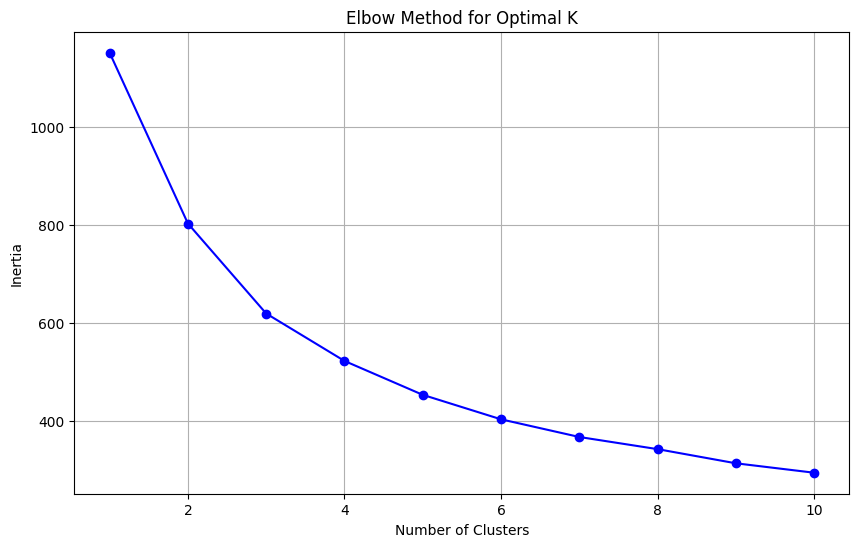

In [7]:
def find_optimal_clusters(X_scaled, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.grid(True)
    plt.show()
    
    return inertias

inertias = find_optimal_clusters(X_scaled)

In [8]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)

sediment_df['kmeans_cluster'] = clusters
print("Cluster distribution:")
print(sediment_df['kmeans_cluster'].value_counts().sort_index())

Cluster distribution:
kmeans_cluster
0    14
1    19
2    63
Name: count, dtype: int64


# Clusters visualization

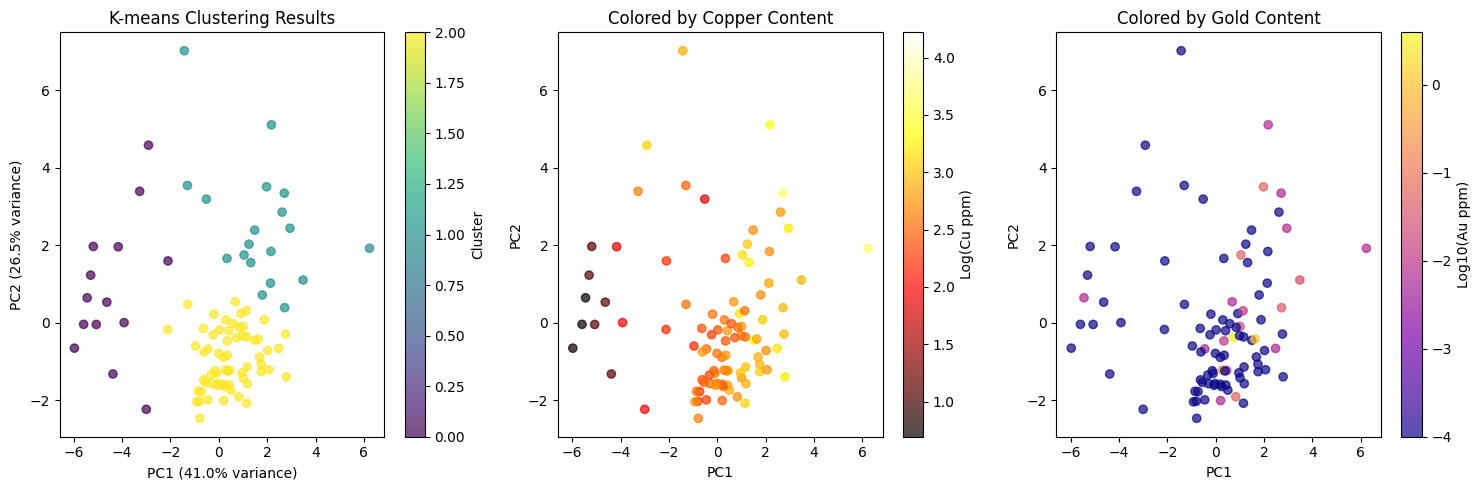

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

# Plot 1: Clusters in PCA space
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('K-means Clustering Results')

# Plot 2: Colored by Copper (Cu)
plt.subplot(1, 3, 2)
cu_log = np.log1p(sediment_df['Cu_AQUA_REGIA_ppm'])
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cu_log, cmap='hot', alpha=0.7)
plt.colorbar(scatter, label='Log(Cu ppm)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Colored by Copper Content')

# Plot 3: Colored by Gold (Au) - FOCUS ON THIS!
plt.subplot(1, 3, 3)
au_positive = sediment_df['Au_AQUA_REGIA_ppm'].clip(lower=0.0001)  # Replace negatives with small positive
au_log = np.log10(au_positive)  # Use log10 for better gold visualization

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=au_log, cmap='plasma', alpha=0.7)
plt.colorbar(scatter, label='Log10(Au ppm)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Colored by Gold Content')

plt.tight_layout()
plt.show()

# Clusters interpretation related to Au and cu

In [10]:
def cu_au_simple_interpretation(sediment_data, clusters):
    results = []
    
    for cluster_id in np.unique(clusters):
        cluster_data = sediment_data[clusters == cluster_id]
        
        # Cu-Au statistics only
        profile = {
            'cluster': cluster_id,
            'n_samples': len(cluster_data),
            
            # Copper metrics
            'Cu_median': cluster_data['Cu_AQUA_REGIA_ppm'].median(),
            'Cu_max': cluster_data['Cu_AQUA_REGIA_ppm'].max(),
            'Cu_90th': cluster_data['Cu_AQUA_REGIA_ppm'].quantile(0.9),
            
            # Gold metrics  
            'Au_median': cluster_data['Au_AQUA_REGIA_ppm'].median(),
            'Au_max': cluster_data['Au_AQUA_REGIA_ppm'].max(),
            'Au_90th': cluster_data['Au_AQUA_REGIA_ppm'].quantile(0.9),
            
            # Detectable gold
            'Au_detectable_count': (cluster_data['Au_AQUA_REGIA_ppm'] > 0).sum(),
            'Au_detectable_pct': (cluster_data['Au_AQUA_REGIA_ppm'] > 0).mean() * 100
        }
        
        interpretation = classify_cu_au_potential(profile)
        profile['interpretation'] = interpretation
        
        results.append(profile)
    
    return pd.DataFrame(results)

def classify_cu_au_potential(profile):
    cu_med = profile['Cu_median']
    cu_max = profile['Cu_max']
    au_med = profile['Au_median'] 
    au_max = profile['Au_max']
    au_detect_pct = profile['Au_detectable_pct']
    
    # 1. HIGH Cu-Au POTENTIAL (consistent mineralization)
    if (cu_med > 20 and au_med > 0.01) or (au_max > 1.0 and au_detect_pct > 20):
        return "HIGH POTENTIAL: Consistent Cu-Au mineralization"
    
    # 2. Cu-DOMINATED POTENTIAL (consistent copper)
    elif cu_med > 20 and au_med < 0.001:
        return "Cu POTENTIAL: Copper-dominated system"
    
    # 3. Au-DOMINATED POTENTIAL (significant gold)
    elif au_max > 0.1 and au_detect_pct > 30:
        return "Au POTENTIAL: Gold-mineralized system"
    
    # 4. SPOT ANOMALIES (high max but low median)
    elif (cu_max > 50 or au_max > 0.1) and au_detect_pct < 30:
        return "ANOMALOUS: Spot mineralization present"
    
    # 5. MODERATE POTENTIAL (elevated background)
    elif (cu_med > 10 or au_med > 0.001) and au_detect_pct > 20:
        return "MODERATE POTENTIAL: Elevated Cu-Au levels"
    
    # 6. WEAK/BACKGROUND (low everything)
    elif cu_med < 10 and au_med < 0.0005:
        return "LOW POTENTIAL: Background levels"
    
    else:
        return "MIXED SIGNATURE: Requires analysis"

# Run the Cu-Au interpretation
cu_au_simple = cu_au_simple_interpretation(sediment_df, clusters)
print("Cu-Au CLUSTER INTERPRETATION (Using Medians)")
print("="*70)
cu_au_simple

Cu-Au CLUSTER INTERPRETATION (Using Medians)


,cluster,n_samples,Cu_median,Cu_max,Cu_90th,Au_median,Au_max,Au_90th,Au_detectable_count,Au_detectable_pct,interpretation
0,0,14,2.0,21,11.5,-0.005,0.006,-0.0050,1,7.142857,LOW POTENTIAL: Background levels
1,1,19,18.0,67,39.0,-0.005,0.059,0.0426,8,42.105263,MODERATE POTENTIAL: Elevated Cu-Au levels
2,2,63,13.0,29,19.8,-0.005,3.950,0.0094,12,19.047619,ANOMALOUS: Spot mineralization present


In [11]:
cluster_2_samples = sediment_df[clusters == 2].copy()

cluster_2_sorted = cluster_2_samples.sort_values('Au_AQUA_REGIA_ppm', ascending=False)

print("CLUSTER 2 SAMPLES - RANKED BY GOLD CONTENT (Highest to Lowest)")
print("="*80)

display_columns = []
possible_columns = [
    'Site_ID', 'Sample_ID', 'Lab_ID', 'Sample_Description',
    'Au_AQUA_REGIA_ppm', 'Cu_AQUA_REGIA_ppm', 
    'As_AQUA_REGIA_ppm', 'Zn_AQUA_REGIA_ppm', 'Mo_AQUA_REGIA_ppm',
    'Sb_AQUA_REGIA_ppm', 'Pb_AQUA_REGIA_ppm'
]

for col in possible_columns:
    if col in sediment_df.columns:
        display_columns.append(col)

print(f"Displaying {len(display_columns)} columns")
print(f"Total samples in Cluster 2: {len(cluster_2_sorted)}")

formatted_df = cluster_2_sorted[display_columns].round({
    'Au_AQUA_REGIA_ppm': 4,
    'Cu_AQUA_REGIA_ppm': 1,
    'As_AQUA_REGIA_ppm': 1,
    'Zn_AQUA_REGIA_ppm': 1,
    'Mo_AQUA_REGIA_ppm': 2,
    'Sb_AQUA_REGIA_ppm': 2,
    'Pb_AQUA_REGIA_ppm': 1
})

formatted_df.head(20)

CLUSTER 2 SAMPLES - RANKED BY GOLD CONTENT (Highest to Lowest)
Displaying 11 columns
Total samples in Cluster 2: 63


,Site_ID,Sample_ID,Lab_ID,Sample_Description,Au_AQUA_REGIA_ppm,Cu_AQUA_REGIA_ppm,As_AQUA_REGIA_ppm,Zn_AQUA_REGIA_ppm,Mo_AQUA_REGIA_ppm,Sb_AQUA_REGIA_ppm,Pb_AQUA_REGIA_ppm
25,18TCIM038,18TCIM038S1,C-471561.1,Stream sediment sieved to -80 mesh,3.950,10,5.3,91.1,0.80,0.2,28.4
38,18TCIM050,18TCIM050S1,C-471574.1,Stream sediment sieved to -80 mesh,1.110,16,7.1,103.0,1.10,0.2,16.3
28,18TCIM041,18TCIM041S1,C-471564.1,Stream sediment sieved to -80 mesh,0.234,13,5.1,65.7,0.80,0.2,10.1
68,18TCIM029,18TCIM029S2,C-471556,Stream sediment sieved to -230 mesh,0.051,14,4.9,57.9,0.54,0.2,8.5
35,18TCIM047,18TCIM047S1,C-471571.1,Stream sediment sieved to -80 mesh,0.024,15,11.4,43.0,0.80,0.3,6.0
72,18TCIM37,18TCIM37S2,C-471560,Stream sediment sieved to -230 mesh,0.011,10,6.2,61.0,0.69,0.3,12.7
62,17TCIM016,17TCIM016S2,C-466804,Stream sediment sieved to -230 mesh,0.010,12,9.0,44.8,1.40,0.4,9.3
20,18TCIM029,18TCIM029S1,C-471556.1,Stream sediment sieved to -80 mesh,0.007,15,4.8,53.2,0.90,0.3,8.8
89,18TCIM053,18TCIM053S2,C-471577,Stream sediment sieved to -230 mesh,0.006,15,7.0,71.3,0.82,0.4,23.6
21,18TCIM030,18TCIM030S1,C-471557.1,Stream sediment sieved to -80 mesh,0.006,12,5.3,43.9,0.80,0.2,9.6


In [12]:
sediment_df.head()

,Lab_ID,Site_ID,Sample_ID,Sample_Description,Al_AQUA_REGIA_pct,Ca_AQUA_REGIA_pct,Fe_AQUA_REGIA_pct,K_AQUA_REGIA_pct,Mg_AQUA_REGIA_pct,Na_AQUA_REGIA_pct,...,LOI_WDXRF-MAJORS_pct,MgO_WDXRF-MAJORS_pct,MnO_WDXRF-MAJORS_pct,Na2O_WDXRF-MAJORS_pct,P2O5_WDXRF-MAJORS_pct,SiO2_WDXRF-MAJORS_pct,SrO_WDXRF-MAJORS_pct,TiO2_WDXRF-MAJORS_pct,V2O5_WDXRF-MAJORS_pct,kmeans_cluster
0,C-450484,17TCIM001,17TCIM001S1,Stream sediment sieved to -80 mesh,0.6,0.2,1.3,0.2,0.1,0.02,...,2.8,0.7,0.04,1.5,0.1,71.8,0.04,0.4,0.01,1
1,C-450483,17TCIM002,17TCIM002S1,Stream sediment sieved to -80 mesh,0.5,0.1,1.4,0.1,0.1,0.03,...,2.7,0.5,0.03,1.1,0.1,72.9,0.04,0.3,-0.01,0
2,C-450482,17TCIM003,17TCIM003S1,Stream sediment sieved to -80 mesh,0.4,0.1,0.6,0.1,0.1,0.04,...,1.2,0.2,0.02,2.6,0.1,74.1,0.01,0.1,0.02,0
3,C-450481,17TCIM004,17TCIM004S1,Stream sediment sieved to -80 mesh,1.3,0.6,2.5,0.1,0.6,0.03,...,7.6,2.2,0.08,2.6,0.2,61.5,0.03,0.8,0.02,2
4,C-450480,17TCIM005,17TCIM005S1,Stream sediment sieved to -80 mesh,0.4,0.1,1.0,0.1,0.1,0.03,...,1.7,0.3,0.04,2.3,0.1,74.0,0.02,0.2,-0.01,0


In [13]:
X_scaled_df["Cluster"] = sediment_df["kmeans_cluster"]

X_scaled_df.head()

,Al_AQUA_REGIA_pct,Fe_AQUA_REGIA_pct,K_AQUA_REGIA_pct,Mg_AQUA_REGIA_pct,Ca_AQUA_REGIA_pct,Mo_AQUA_REGIA_ppm,As_AQUA_REGIA_ppm,Sb_AQUA_REGIA_ppm,Zn_AQUA_REGIA_ppm,Pb_AQUA_REGIA_ppm,Mn_COLD_HYD_LEACH_Stage2_ppm,As_COLD_HYD_LEACH_Stage2_ppm,Cluster
0,-1.631113,-1.065548,2.932576,-1.973925,-1.502552,4.570107,0.262820,4.002226,-1.520201,3.330013,-1.050943,-0.537692,1
1,-2.037306,-0.886120,-0.340997,-1.973925,-2.256405,2.131395,0.825606,-0.171825,-1.665226,0.955009,-1.630132,-1.086823,0
2,-2.471534,-2.595524,-0.340997,-1.973925,-2.256405,-1.335463,-0.512071,-0.682742,-1.852455,0.796109,-1.789679,-1.059970,0
3,0.652943,0.704518,-0.340997,1.231168,0.989879,0.563175,0.217743,0.301210,1.363502,0.611429,-0.945520,-0.968412,2
4,-2.471534,-1.654771,-0.340997,-1.973925,-2.256405,0.435749,0.051777,-0.682742,-1.609592,0.611429,-0.667525,-1.343968,0


# Mineralization prediction

In [14]:
X = X_scaled_df.drop(["Cluster"], axis=1)
y = X_scaled_df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## LOGISTIC REGRESSION

In [15]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for i in [1000, 1000/3, 100, 100/3, 10, 10/3, 1]:
    logreg = LogisticRegression(
        C=i,
        max_iter=500,
        random_state=42
    )
    cv_results = cross_validate(
        logreg,
        X_train,
        y_train,
        cv=3,
        scoring=scoring
    )
    print(f"\nFor C={i:.3f}:")
    print("-" * 30)
    for metric in scoring:
        mean_score = cv_results[f'test_{metric}'].mean()
        std_score = cv_results[f'test_{metric}'].std()
        print(f"{metric}: {mean_score:.4f} (±{std_score:.4f})")


For C=1000.000:
------------------------------
accuracy: 0.9744 (±0.0363)
precision_macro: 0.9753 (±0.0349)
recall_macro: 0.9444 (±0.0786)
f1_macro: 0.9497 (±0.0712)

For C=333.333:
------------------------------
accuracy: 0.9744 (±0.0363)
precision_macro: 0.9753 (±0.0349)
recall_macro: 0.9444 (±0.0786)
f1_macro: 0.9497 (±0.0712)

For C=100.000:
------------------------------
accuracy: 0.9872 (±0.0181)
precision_macro: 0.9938 (±0.0087)
recall_macro: 0.9722 (±0.0393)
f1_macro: 0.9810 (±0.0269)

For C=33.333:
------------------------------
accuracy: 0.9872 (±0.0181)
precision_macro: 0.9938 (±0.0087)
recall_macro: 0.9722 (±0.0393)
f1_macro: 0.9810 (±0.0269)

For C=10.000:
------------------------------
accuracy: 0.9872 (±0.0181)
precision_macro: 0.9938 (±0.0087)
recall_macro: 0.9722 (±0.0393)
f1_macro: 0.9810 (±0.0269)

For C=3.333:
------------------------------
accuracy: 0.9872 (±0.0181)
precision_macro: 0.9938 (±0.0087)
recall_macro: 0.9722 (±0.0393)
f1_macro: 0.9810 (±0.0269)

For C=

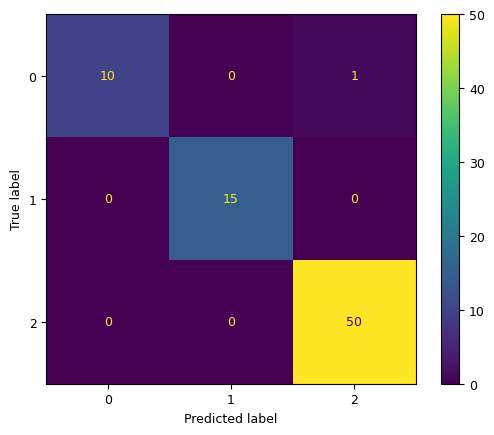

In [16]:
# # Best is: C=1
logreg = LogisticRegression(
        max_iter=500,
        random_state=42
    )

y_train_pred = cross_val_predict(logreg, X_train, y_train, cv=3)
plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

## SVM

In [17]:
for i in [1000, 1000/3, 100, 100/3, 10, 10/3, 1]:
    svm = SVC(
        C=i,
        random_state=42
    )
    cv_results = cross_validate(
        svm,
        X_train,
        y_train,
        cv=3,
        scoring=scoring
    )
    print(f"\nFor C={i:.3f}:")
    print("-" * 30)
    for score in scoring:
        mean = cv_results[f"test_{score}"].mean()
        std = cv_results[f"test_{score}"].std()
        print(f"{score}: {mean:.4f} (±{std:.4f})")
    print('\n\n')


For C=1000.000:


------------------------------
accuracy: 0.9349 (±0.0355)
precision_macro: 0.9355 (±0.0319)
recall_macro: 0.8722 (±0.0864)
f1_macro: 0.8731 (±0.0876)




For C=333.333:
------------------------------
accuracy: 0.9349 (±0.0355)
precision_macro: 0.9355 (±0.0319)
recall_macro: 0.8722 (±0.0864)
f1_macro: 0.8731 (±0.0876)




For C=100.000:
------------------------------
accuracy: 0.9349 (±0.0355)
precision_macro: 0.9355 (±0.0319)
recall_macro: 0.8722 (±0.0864)
f1_macro: 0.8731 (±0.0876)




For C=33.333:
------------------------------
accuracy: 0.9349 (±0.0355)
precision_macro: 0.9355 (±0.0319)
recall_macro: 0.8722 (±0.0864)
f1_macro: 0.8731 (±0.0876)




For C=10.000:
------------------------------
accuracy: 0.9349 (±0.0355)
precision_macro: 0.9355 (±0.0319)
recall_macro: 0.8722 (±0.0864)
f1_macro: 0.8731 (±0.0876)




For C=3.333:
------------------------------
accuracy: 0.9349 (±0.0355)
precision_macro: 0.9355 (±0.0319)
recall_macro: 0.8722 (±0.0864)
f1_macro: 0.8731 (±0.0876)




For 

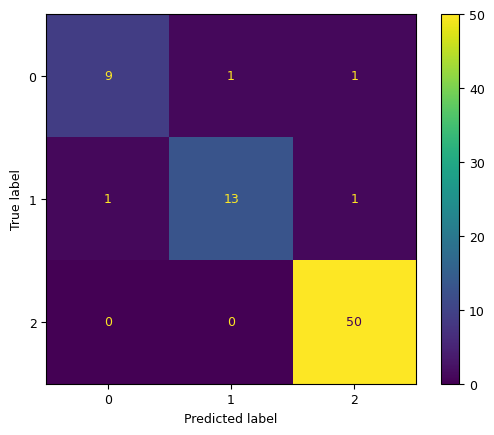

In [18]:
svm = SVC(random_state=42)
y_train_pred = cross_val_predict(svm, X_train, y_train, cv=3)
plt.rc('font', size=9)  
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

## XGBOOST

In [19]:
for n_estimators in [100,200]:
    for learning_rate in [0.01, 0.1, 0.2]:
        xgb_clf = XGBClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=42,
            n_jobs=-1     
        )
        cv_results = cross_validate(
            xgb_clf,
            X_train,
            y_train,
            cv=3,
            scoring=scoring
        )
        print(f"n_estimators={n_estimators}, learning_rate={learning_rate}:")
        for score in scoring:
            mean = cv_results[f"test_{score}"].mean()
            std = cv_results[f"test_{score}"].std()
            print(f"  {score}: {mean:.4f} (±{std:.4f})")
        print("\n")

n_estimators=100, learning_rate=0.01:
  accuracy: 0.8554 (±0.0176)
  precision_macro: 0.8228 (±0.0512)
  recall_macro: 0.8123 (±0.0277)
  f1_macro: 0.8105 (±0.0359)


n_estimators=100, learning_rate=0.1:
  accuracy: 0.8954 (±0.0477)
  precision_macro: 0.8948 (±0.0994)
  recall_macro: 0.8480 (±0.0605)
  f1_macro: 0.8531 (±0.0740)


n_estimators=100, learning_rate=0.2:
  accuracy: 0.8954 (±0.0348)
  precision_macro: 0.8945 (±0.0982)
  recall_macro: 0.8480 (±0.0263)
  f1_macro: 0.8575 (±0.0568)


n_estimators=200, learning_rate=0.01:
  accuracy: 0.8687 (±0.0160)
  precision_macro: 0.8375 (±0.0580)
  recall_macro: 0.8346 (±0.0168)
  f1_macro: 0.8320 (±0.0388)


n_estimators=200, learning_rate=0.1:
  accuracy: 0.8954 (±0.0477)
  precision_macro: 0.8948 (±0.0994)
  recall_macro: 0.8480 (±0.0605)
  f1_macro: 0.8531 (±0.0740)


n_estimators=200, learning_rate=0.2:
  accuracy: 0.8954 (±0.0348)
  precision_macro: 0.8945 (±0.0982)
  recall_macro: 0.8480 (±0.0263)
  f1_macro: 0.8575 (±0.0568)




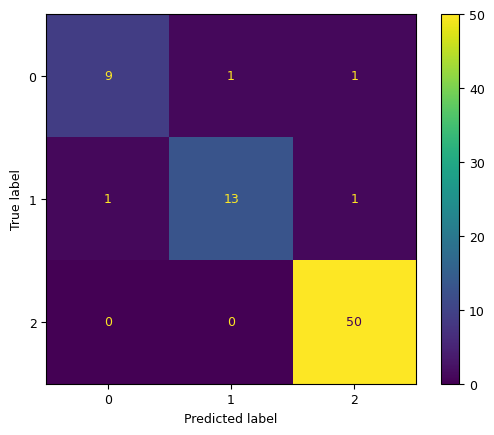

In [20]:
xgb_clf = XGBClassifier(
            n_estimators=100,
            learning_rate=0.2,
            random_state=42,
            n_jobs=-1    
        )

y_train_pred = cross_val_predict(svm, X_train, y_train, cv=3)
plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

# Benchmarking on test set

In [21]:
preds = {
    "logreg_preds":None,
    "svm_preds":None,
    "xgb_clf_preds":None
}
results = {
    'accuracy': {
        "logreg":None,
        "svm":None,
        "xgb_clf":None
    },
    'precision': {
        "logreg":None,
        "svm":None,
        "xgb_clf":None
    },
    'recall': {
        "logreg":None,
        "svm":None,
        "xgb_clf":None
    },
    'f1_score': {
        "logreg":None,
        "svm":None,
        "xgb_clf":None
    }
}
models = {
    "logreg":LogisticRegression(max_iter=500, random_state=42),
    "svm": SVC(random_state=42),
    "xgb_clf": XGBClassifier(
            n_estimators=100,
            learning_rate=0.2,
            random_state=42,
            n_jobs=-1 
        )
}

for name, model in models.items():
    mdl = model.fit(X_train, y_train)
    preds[f"{name}_preds"] = mdl.predict(X_test)

    report = classification_report(y_test, preds[f"{name}_preds"], output_dict=True)

    for metric in results.keys():
        if metric == 'accuracy':
            results[metric][name] = accuracy_score(y_test, preds[f"{name}_preds"])
        elif metric == "f1_score":
             results[metric][name] = report['macro avg']['f1-score']
        else:
            results[metric][name] = report['macro avg'][metric]

In [22]:
results_df = pd.DataFrame(results).sort_values(by=['f1_score', 'accuracy'], ascending=[False, False])
results_df

,accuracy,precision,recall,f1_score
logreg,1.00,1.000000,1.000000,1.000000
xgb_clf,0.95,0.916667,0.974359,0.939048
svm,0.95,0.916667,0.916667,0.904762


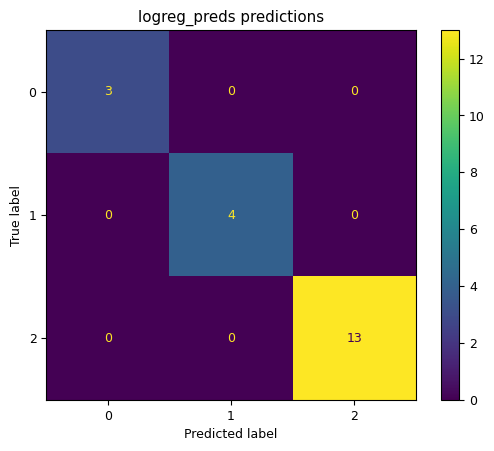

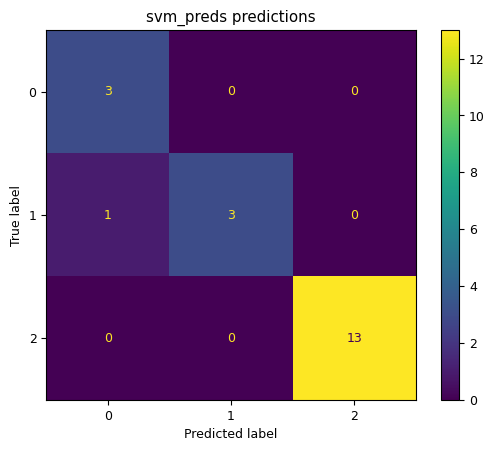

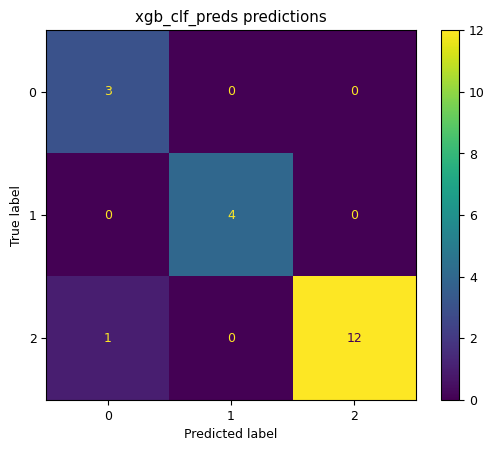

In [23]:
for model, predictions in preds.items():
    ConfusionMatrixDisplay.from_predictions(y_test,predictions)
    plt.title(f"{model} predictions")
    plt.show()